In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

from fredapi import Fred

In [2]:
fred = Fred(api_key = '303a32ff357b64400a58c6e20db08983')

In [3]:
fred.search('S&P').head(5)

id realtime_start realtime_end  \
series id                                            
SP500            SP500     2023-08-18   2023-08-18   
VXVCLS          VXVCLS     2023-08-18   2023-08-18   
VXOCLS          VXOCLS     2023-08-18   2023-08-18   
CSUSHPINSA  CSUSHPINSA     2023-08-18   2023-08-18   
CSUSHPISA    CSUSHPISA     2023-08-18   2023-08-18   

                                                        title  \
series id                                                       
SP500                                                 S&P 500   
VXVCLS                  CBOE S&P 500 3-Month Volatility Index   
VXOCLS      CBOE S&P 100 Volatility Index: VXO (DISCONTINUED)   
CSUSHPINSA    S&P/Case-Shiller U.S. National Home Price Index   
CSUSHPISA     S&P/Case-Shiller U.S. National Home Price Index   

           observation_start observation_end     frequency frequency_short  \
series id                                                                    
SP500             2013-08-19      2023-08-17  Daily, Close               D   
VXVCLS            2007-12-04      2023-08-16  Daily, Close               D   
VXOCLS            1986-01-02      2021-09-23  Daily, Close               D   
CSUSHPINSA        1987-01-01      2023-05-01       Monthly               M   
CSUSHPISA         1987-01-01      2023-05-01       Monthly               M   

                         units         units_short      seasonal_adjustment  \
series id                                                                     
SP500                    Index               Index  Not Seasonally Adjusted   
VXVCLS                   Index               Index  Not Seasonally Adjusted   
VXOCLS                   Index               Index  Not Seasonally Adjusted   
CSUSHPINSA  Index Jan 2000=100  Index Jan 2000=100  Not Seasonally Adjusted   
CSUSHPISA   Index Jan 2000=100  Index Jan 2000=100      Seasonally Adjusted   

           seasonal_adjustment_short               last_updated popularity  \
series id                                                                    
SP500                            NSA  2023-08-17 19:10:53-05:00         82   
VXVCLS                           NSA  2023-08-17 08:36:08-05:00         53   
VXOCLS                           NSA  2021-09-24 08:36:03-05:00         31   
CSUSHPINSA                       NSA  2023-07-25 08:11:01-05:00         90   
CSUSHPISA                         SA  2023-07-25 08:11:03-05:00         79   

                                                        notes  
series id                                                      
SP500       The observations for the S&P 500 represent the...  
VXVCLS      Copyright, 2016, Chicago Board Options Exchang...  
VXOCLS      This series is no longer being updated by the ...  
CSUSHPINSA  For more information regarding the index, plea...  
CSUSHPISA   For more information regarding the index, plea...

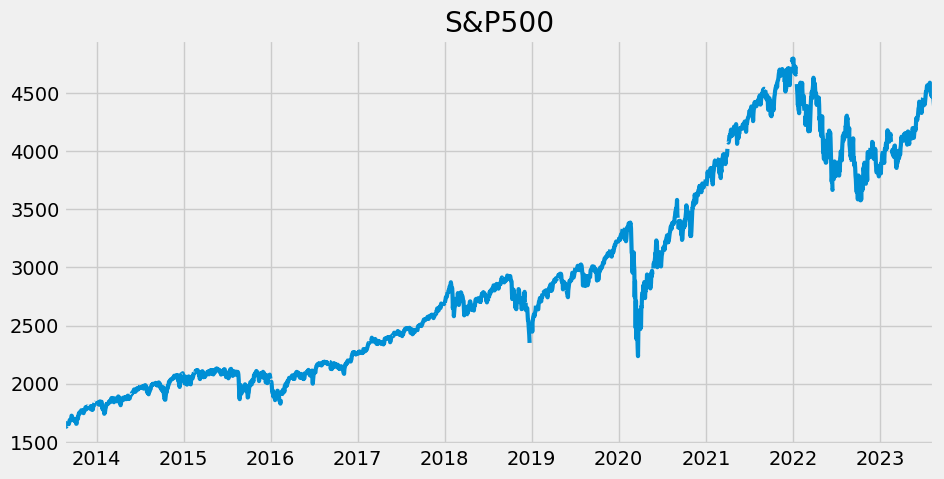

In [4]:
fred.get_series(series_id='SP500').plot(figsize=(10,5), title='S&P500', lw = 3)
plt.show()

In [5]:
sp = fred.get_series(series_id='SP500')
sp

2013-08-19    1646.06
2013-08-20    1652.35
2013-08-21    1642.80
2013-08-22    1656.96
2013-08-23    1663.50
               ...   
2023-08-11    4464.05
2023-08-14    4489.72
2023-08-15    4437.86
2023-08-16    4404.33
2023-08-17    4370.36
Length: 2609, dtype: float64

PULL and JOIN multiple series

In [6]:
unemploy = fred.search('unemployment rate state', filter= ('frequency','Monthly'))
unemploy = unemploy.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemploy = unemploy.loc[unemploy['title'].str.contains('Unemployment Rate in')]
#unemploy.shape

In [7]:
unemploy.tail()

id realtime_start realtime_end  \
series id                                         
CNERUR       CNERUR     2023-08-18   2023-08-18   
USAURAMS   USAURAMS     2023-08-18   2023-08-18   
CSOUUR       CSOUUR     2023-08-18   2023-08-18   
CNEWUR       CNEWUR     2023-08-18   2023-08-18   
CWSTUR       CWSTUR     2023-08-18   2023-08-18   

                                                       title  \
series id                                                      
CNERUR          Unemployment Rate in Northeast Census Region   
USAURAMS   Unemployment Rate in the United States (DISCON...   
CSOUUR              Unemployment Rate in South Census Region   
CNEWUR      Unemployment Rate in New England Census Division   
CWSTUR               Unemployment Rate in West Census Region   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CNERUR           1976-01-01      2023-06-01   Monthly               M   
USAURAMS         2007-01-01      2013-06-01   Monthly               M   
CSOUUR           1976-01-01      2023-06-01   Monthly               M   
CNEWUR           1976-01-01      2023-06-01   Monthly               M   
CWSTUR           1976-01-01      2023-06-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CNERUR     Percent           %  Seasonally Adjusted                        SA   
USAURAMS   Percent           %  Seasonally Adjusted                        SA   
CSOUUR     Percent           %  Seasonally Adjusted                        SA   
CNEWUR     Percent           %  Seasonally Adjusted                        SA   
CWSTUR     Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity  \
series id                                         
CNERUR     2023-07-26 14:42:19-05:00          2   
USAURAMS   2013-09-03 11:06:07-05:00          1   
CSOUUR     2023-07-26 14:42:20-05:00          4   
CNEWUR     2023-07-26 14:42:19-05:00          3   
CWSTUR     2023-07-26 14:42:21-05:00          2   

                                                       notes  
series id                                                     
CNERUR                                                  None  
USAURAMS   Bureau of Labor Statistics (BLS) has eliminate...  
CSOUUR                                                  None  
CNEWUR                                                  None  
CWSTUR                                                  None

In [8]:
for idx in unemploy.index:
    print(idx)

CAUR
TXUR
FLUR
NYUR
MIUR
OHUR
NCUR
PAUR
MAUR
ALUR
TNUR
MNUR
COUR
NJUR
ILUR
WIUR
SCUR
GAUR
ORUR
AZUR
VAUR
MOUR
WAUR
UTUR
KYUR
MDUR
INUR
OKUR
ARUR
LAUR
KSUR
NEUR
AKUR
IAUR
NVUR
WVUR
LASMT261982000000003
DCUR
NMUR
PRUR
CTUR
MTUR
HIUR
SDUR
NDUR
LASMT391746000000003
MSUR
DEUR
VTUR
RIUR
CMWRUR
IDUR
MEUR
WYUR
NHUR
CNERUR
USAURAMS
CSOUUR
CNEWUR
CWSTUR


In [9]:
all_results = []
for idx in unemploy.index:
    results = fred.get_series(series_id = idx)
    results = results.to_frame(name=idx)
    all_results.append(results)
#all_results[1]

unemp_df = pd.concat(all_results, axis = 1)
unemp_df = unemp_df.drop(columns=['LASMT261982000000003', 'LASMT391746000000003','USAURAMS'], axis = 1)

In [10]:
unemp_df.head(10)

CAUR  TXUR  FLUR  NYUR  MIUR  OHUR  NCUR  PAUR  MAUR  ALUR  TNUR  \
1976-01-01   9.2   5.8   9.7  10.3   9.9   8.1   6.4   8.0  10.5   6.6   6.0   
1976-02-01   9.2   5.8   9.7  10.3   9.9   8.1   6.4   8.1  10.5   6.6   6.0   
1976-03-01   9.1   5.9   9.6  10.2   9.9   8.1   6.4   8.1  10.5   6.6   6.0   
1976-04-01   9.1   5.9   9.5  10.2   9.8   8.0   6.3   8.1  10.3   6.5   6.0   
1976-05-01   9.0   5.9   9.3  10.1   9.6   7.8   6.1   8.1  10.1   6.4   5.9   
1976-06-01   9.0   5.9   9.2  10.2   9.4   7.6   6.0   8.0   9.8   6.5   5.9   
1976-07-01   9.0   5.9   9.1  10.2   9.2   7.5   5.9   7.9   9.6   6.6   6.0   
1976-08-01   9.1   5.8   9.1  10.2   9.1   7.5   5.9   7.9   9.4   6.7   6.1   
1976-09-01   9.2   5.7   9.1  10.2   9.0   7.5   6.0   7.9   9.2   6.8   6.1   
1976-10-01   9.3   5.7   9.1  10.2   9.0   7.5   6.2   7.9   9.1   6.9   6.3   

            MNUR  COUR  NJUR  ILUR  WIUR  SCUR  GAUR  ORUR  AZUR  VAUR  MOUR  \
1976-01-01   6.0   5.8  10.3   6.6   5.8   7.4   8.4   9.5  10.2   6.1   5.9   
1976-02-01   6.0   5.7  10.3   6.6   5.8   7.4   8.4   9.5  10.2   6.1   5.9   
1976-03-01   5.9   5.7  10.3   6.6   5.7   7.3   8.4   9.4  10.1   6.1   5.9   
1976-04-01   5.8   5.6  10.3   6.6   5.6   7.2   8.3   9.2  10.0   6.0   6.0   
1976-05-01   5.7   5.6  10.3   6.6   5.5   7.0   8.1   9.1   9.8   5.9   6.0   
1976-06-01   5.6   5.6  10.3   6.6   5.4   6.9   8.0   9.0   9.7   5.8   6.1   
1976-07-01   5.6   5.8  10.4   6.6   5.3   6.8   8.0   9.1   9.7   5.8   6.2   
1976-08-01   5.7   5.9  10.4   6.6   5.3   6.8   8.0   9.2   9.6   5.8   6.3   
1976-09-01   5.7   6.1  10.4   6.6   5.4   6.8   8.0   9.2   9.6   5.8   6.4   
1976-10-01   5.8   6.3  10.5   6.5   5.4   6.8   8.1   9.3   9.5   5.7   6.5   

            WAUR  UTUR  KYUR  MDUR  INUR  OKUR  ARUR  LAUR  KSUR  NEUR  AKUR  \
1976-01-01   8.5   5.8   5.6   6.4   6.6   5.8   7.3   6.3   4.2   3.3   7.1   
1976-02-01   8.5   5.9   5.6   6.4   6.6   5.8   7.3   6.3   4.2   3.3   7.1   
1976-03-01   8.4   5.8   5.6   6.4   6.5   5.8   7.3   6.3   4.2   3.3   7.0   
1976-04-01   8.5   5.8   5.6   6.4   6.3   5.8   7.2   6.4   4.2   3.2   6.9   
1976-05-01   8.5   5.7   5.5   6.5   6.0   5.7   7.1   6.5   4.2   3.1   6.9   
1976-06-01   8.6   5.6   5.5   6.5   5.8   5.6   6.9   6.7   4.1   3.1   7.1   
1976-07-01   8.7   5.5   5.4   6.6   5.7   5.6   6.8   6.8   4.1   3.0   7.3   
1976-08-01   8.9   5.4   5.4   6.6   5.7   5.5   6.7   6.8   4.1   3.1   7.6   
1976-09-01   9.0   5.4   5.3   6.7   5.7   5.4   6.6   6.9   4.1   3.1   8.0   
1976-10-01   9.1   5.4   5.2   6.7   5.8   5.4   6.6   6.9   4.1   3.1   8.3   

            IAUR  NVUR  WVUR  DCUR  NMUR  PRUR  CTUR  MTUR  HIUR  SDUR  NDUR  \
1976-01-01   4.3   9.2   7.5   8.7   8.6  19.6   9.8   5.8   9.8   3.3   3.4   
1976-02-01   4.3   9.2   7.5   8.7   8.7  19.5   9.8   5.8   9.8   3.3   3.4   
1976-03-01   4.3   9.2   7.5   8.6   8.7  19.3   9.8   5.8   9.8   3.2   3.4   
1976-04-01   4.2   9.0   7.5   8.5   8.6  19.0   9.6   5.8   9.7   3.1   3.5   
1976-05-01   4.1   8.9   7.4   8.4   8.6  18.9   9.4   5.8   9.4   3.1   3.6   
1976-06-01   4.0   8.7   7.4   8.3   8.6  18.9   9.3   5.8   9.2   3.1   3.7   
1976-07-01   4.0   8.6   7.2   8.4   8.6  19.1   9.1   5.9   9.0   3.2   3.8   
1976-08-01   3.9   8.6   7.1   8.5   8.6  19.4   9.0   5.9   8.9   3.3   3.9   
1976-09-01   3.9   8.6   6.9   8.7   8.7  19.8   8.8   5.9   8.8   3.4   4.0   
1976-10-01   4.0   8.6   6.8   8.8   8.9  19.9   8.7   6.0   8.7   3.5   4.1   

            MSUR  DEUR  VTUR  RIUR  CMWRUR  IDUR  MEUR  WYUR  NHUR  CNERUR  \
1976-01-01   6.7   8.0   8.6   7.8     6.8   5.6   8.7   4.1   6.5     9.6   
1976-02-01   6.7   8.0   8.6   7.8     6.8   5.6   8.7   4.1   6.5     9.6   
1976-03-01   6.6   8.0   8.6   7.7     6.8   5.6   8.6   4.1   6.5     9.6   
1976-04-01   6.4   8.1   8.6   7.7     6.7   5.6   8.6   4.0   6.5     9.5   
1976-05-01   6.3   8.3   8.5   7.7     6.6   5.6   8.5   3.9   6.5     9.5   
1976-06-01   6.2   8

In [11]:
unemp_df.isna().sum()
unemp_df.dropna()
unemp_df.shape

(570, 57)

In [12]:
px.line(unemp_df, title='Unemployement Rate of all States')

In [13]:
unemp_df.head()

CAUR  TXUR  FLUR  NYUR  MIUR  OHUR  NCUR  PAUR  MAUR  ALUR  TNUR  \
1976-01-01   9.2   5.8   9.7  10.3   9.9   8.1   6.4   8.0  10.5   6.6   6.0   
1976-02-01   9.2   5.8   9.7  10.3   9.9   8.1   6.4   8.1  10.5   6.6   6.0   
1976-03-01   9.1   5.9   9.6  10.2   9.9   8.1   6.4   8.1  10.5   6.6   6.0   
1976-04-01   9.1   5.9   9.5  10.2   9.8   8.0   6.3   8.1  10.3   6.5   6.0   
1976-05-01   9.0   5.9   9.3  10.1   9.6   7.8   6.1   8.1  10.1   6.4   5.9   

            MNUR  COUR  NJUR  ILUR  WIUR  SCUR  GAUR  ORUR  AZUR  VAUR  MOUR  \
1976-01-01   6.0   5.8  10.3   6.6   5.8   7.4   8.4   9.5  10.2   6.1   5.9   
1976-02-01   6.0   5.7  10.3   6.6   5.8   7.4   8.4   9.5  10.2   6.1   5.9   
1976-03-01   5.9   5.7  10.3   6.6   5.7   7.3   8.4   9.4  10.1   6.1   5.9   
1976-04-01   5.8   5.6  10.3   6.6   5.6   7.2   8.3   9.2  10.0   6.0   6.0   
1976-05-01   5.7   5.6  10.3   6.6   5.5   7.0   8.1   9.1   9.8   5.9   6.0   

            WAUR  UTUR  KYUR  MDUR  INUR  OKUR  ARUR  LAUR  KSUR  NEUR  AKUR  \
1976-01-01   8.5   5.8   5.6   6.4   6.6   5.8   7.3   6.3   4.2   3.3   7.1   
1976-02-01   8.5   5.9   5.6   6.4   6.6   5.8   7.3   6.3   4.2   3.3   7.1   
1976-03-01   8.4   5.8   5.6   6.4   6.5   5.8   7.3   6.3   4.2   3.3   7.0   
1976-04-01   8.5   5.8   5.6   6.4   6.3   5.8   7.2   6.4   4.2   3.2   6.9   
1976-05-01   8.5   5.7   5.5   6.5   6.0   5.7   7.1   6.5   4.2   3.1   6.9   

            IAUR  NVUR  WVUR  DCUR  NMUR  PRUR  CTUR  MTUR  HIUR  SDUR  NDUR  \
1976-01-01   4.3   9.2   7.5   8.7   8.6  19.6   9.8   5.8   9.8   3.3   3.4   
1976-02-01   4.3   9.2   7.5   8.7   8.7  19.5   9.8   5.8   9.8   3.3   3.4   
1976-03-01   4.3   9.2   7.5   8.6   8.7  19.3   9.8   5.8   9.8   3.2   3.4   
1976-04-01   4.2   9.0   7.5   8.5   8.6  19.0   9.6   5.8   9.7   3.1   3.5   
1976-05-01   4.1   8.9   7.4   8.4   8.6  18.9   9.4   5.8   9.4   3.1   3.6   

            MSUR  DEUR  VTUR  RIUR  CMWRUR  IDUR  MEUR  WYUR  NHUR  CNERUR  \
1976-01-01   6.7   8.0   8.6   7.8     6.8   5.6   8.7   4.1   6.5     9.6   
1976-02-01   6.7   8.0   8.6   7.8     6.8   5.6   8.7   4.1   6.5     9.6   
1976-03-01   6.6   8.0   8.6   7.7     6.8   5.6   8.6   4.1   6.5     9.6   
1976-04-01   6.4   8.1   8.6   7.7     6.7   5.6   8.6   4.0   6.5     9.5   
1976-05-01   6.3   8.3   8.5   7.7     6.6   5.6   8.5   3.9   6.5     9.5   

            CSOUUR  CNEWUR  CWSTUR  
1976-01-01     6.9     9.6     8.6  
1976-02-01     6.9     9.6     8.6  
1976-03-01     6.9     9.6     8.6  
1976-04-01     6.8     9.4     8.5  
1976-05-01     6.7     9.3     8.5

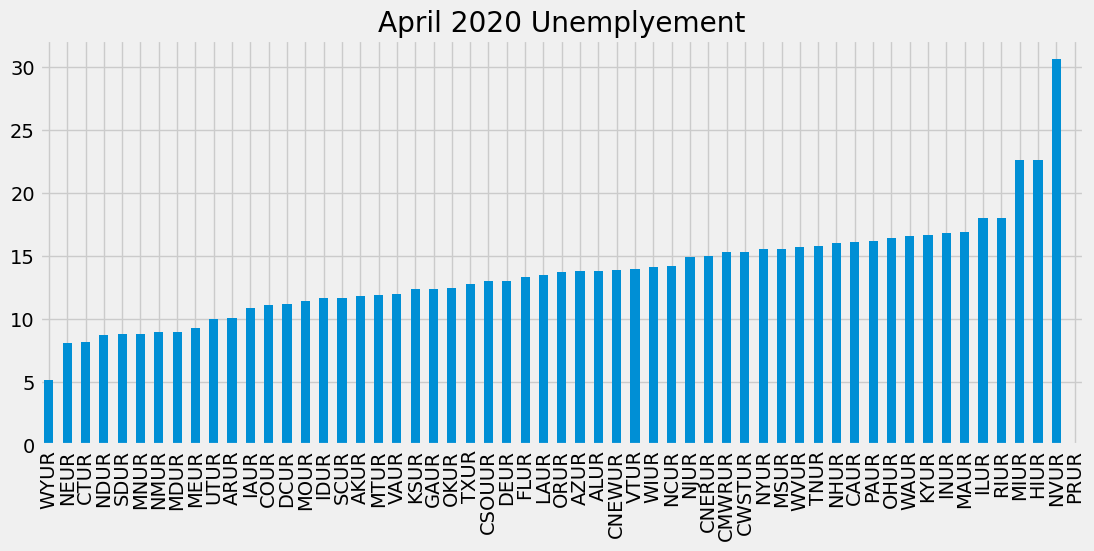

In [14]:
ax = unemp_df[unemp_df.index == '2020-04-01'].T.sort_values('2020-04-01').plot(kind = 'bar', figsize=(12,5), title = 'April 2020 Unemplyement')
ax.legend().remove()
plt.show()

In [15]:
unemploy.head(10)

id realtime_start realtime_end  \
series id                                     
CAUR       CAUR     2023-08-18   2023-08-18   
TXUR       TXUR     2023-08-18   2023-08-18   
FLUR       FLUR     2023-08-18   2023-08-18   
NYUR       NYUR     2023-08-18   2023-08-18   
MIUR       MIUR     2023-08-18   2023-08-18   
OHUR       OHUR     2023-08-18   2023-08-18   
NCUR       NCUR     2023-08-18   2023-08-18   
PAUR       PAUR     2023-08-18   2023-08-18   
MAUR       MAUR     2023-08-18   2023-08-18   
ALUR       ALUR     2023-08-18   2023-08-18   

                                         title observation_start  \
series id                                                          
CAUR           Unemployment Rate in California        1976-01-01   
TXUR                Unemployment Rate in Texas        1976-01-01   
FLUR              Unemployment Rate in Florida        1976-01-01   
NYUR             Unemployment Rate in New York        1976-01-01   
MIUR             Unemployment Rate in Michigan        1976-01-01   
OHUR                 Unemployment Rate in Ohio        1976-01-01   
NCUR       Unemployment Rate in North Carolina        1976-01-01   
PAUR         Unemployment Rate in Pennsylvania        1976-01-01   
MAUR        Unemployment Rate in Massachusetts        1976-01-01   
ALUR              Unemployment Rate in Alabama        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
CAUR           2023-06-01   Monthly               M  Percent           %   
TXUR           2023-06-01   Monthly               M  Percent           %   
FLUR           2023-06-01   Monthly               M  Percent           %   
NYUR           2023-06-01   Monthly               M  Percent           %   
MIUR           2023-06-01   Monthly               M  Percent           %   
OHUR           2023-06-01   Monthly               M  Percent           %   
NCUR           2023-06-01   Monthly               M  Percent           %   
PAUR           2023-06-01   Monthly               M  Percent           %   
MAUR           2023-06-01   Monthly               M  Percent           %   
ALUR           2023-06-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
CAUR       Seasonally Adjusted                        SA   
TXUR       Seasonally Adjusted                        SA   
FLUR       Seasonally Adjusted                        SA   
NYUR       Seasonally Adjusted                        SA   
MIUR       Seasonally Adjusted                        SA   
OHUR       Seasonally Adjusted                        SA   
NCUR       Seasonally Adjusted                        SA   
PAUR       Seasonally Adjusted                        SA   
MAUR       Seasonally Adjusted                        SA   
ALUR       Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2023-07-26 14:43:01-05:00         57  None  
TXUR       2023-07-26 14:42:02-05:00         49  None  
FLUR       2023-07-26 14:42:02-05:00         48  None  
NYUR       2023-07-26 14:42:03-05:00         44  None  
MIUR       2023-07-26 14:42:04-05:00         33  None  
OHUR       2023-07-26 14:42:03-05:00         36  None  
NCUR       2023-07-26 14:42:05-05:00         27  None  
PAUR       2023-07-26 14:42:04-05:00         31  None  
MAUR       2023-07-26 14:42:04-05:00         32  None  
ALUR       2023-07-26 14:43:02-05:00         32  None

In [16]:
states_dict = unemploy['title'].str.replace('Unemployment Rate in ',"").to_dict()
states_dict

{'CAUR': 'California',
 'TXUR': 'Texas',
 'FLUR': 'Florida',
 'NYUR': 'New York',
 'MIUR': 'Michigan',
 'OHUR': 'Ohio',
 'NCUR': 'North Carolina',
 'PAUR': 'Pennsylvania',
 'MAUR': 'Massachusetts',
 'ALUR': 'Alabama',
 'TNUR': 'Tennessee',
 'MNUR': 'Minnesota',
 'COUR': 'Colorado',
 'NJUR': 'New Jersey',
 'ILUR': 'Illinois',
 'WIUR': 'Wisconsin',
 'SCUR': 'South Carolina',
 'GAUR': 'Georgia',
 'ORUR': 'Oregon',
 'AZUR': 'Arizona',
 'VAUR': 'Virginia',
 'MOUR': 'Missouri',
 'WAUR': 'Washington',
 'UTUR': 'Utah',
 'KYUR': 'Kentucky',
 'MDUR': 'Maryland',
 'INUR': 'Indiana',
 'OKUR': 'Oklahoma',
 'ARUR': 'Arkansas',
 'LAUR': 'Louisiana',
 'KSUR': 'Kansas',
 'NEUR': 'Nebraska',
 'AKUR': 'Alaska',
 'IAUR': 'Iowa',
 'NVUR': 'Nevada',
 'WVUR': 'West Virginia',
 'LASMT261982000000003': 'Detroit-Warren-Dearborn, MI (MSA)',
 'DCUR': 'the District of Columbia',
 'NMUR': 'New Mexico',
 'PRUR': 'Puerto Rico',
 'CTUR': 'Connecticut',
 'MTUR': 'Montana',
 'HIUR': 'Hawaii',
 'SDUR': 'South Dakota',
 '

In [17]:
unemp_df.columns

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'MIUR', 'OHUR', 'NCUR', 'PAUR', 'MAUR',
       'ALUR', 'TNUR', 'MNUR', 'COUR', 'NJUR', 'ILUR', 'WIUR', 'SCUR', 'GAUR',
       'ORUR', 'AZUR', 'VAUR', 'MOUR', 'WAUR', 'UTUR', 'KYUR', 'MDUR', 'INUR',
       'OKUR', 'ARUR', 'LAUR', 'KSUR', 'NEUR', 'AKUR', 'IAUR', 'NVUR', 'WVUR',
       'DCUR', 'NMUR', 'PRUR', 'CTUR', 'MTUR', 'HIUR', 'SDUR', 'NDUR', 'MSUR',
       'DEUR', 'VTUR', 'RIUR', 'CMWRUR', 'IDUR', 'MEUR', 'WYUR', 'NHUR',
       'CNERUR', 'CSOUUR', 'CNEWUR', 'CWSTUR'],
      dtype='object')

In [18]:
unemp_df.columns = [states_dict[i] for i in unemp_df.columns]

In [19]:
unemp_df.columns

Index(['California', 'Texas', 'Florida', 'New York', 'Michigan', 'Ohio',
       'North Carolina', 'Pennsylvania', 'Massachusetts', 'Alabama',
       'Tennessee', 'Minnesota', 'Colorado', 'New Jersey', 'Illinois',
       'Wisconsin', 'South Carolina', 'Georgia', 'Oregon', 'Arizona',
       'Virginia', 'Missouri', 'Washington', 'Utah', 'Kentucky', 'Maryland',
       'Indiana', 'Oklahoma', 'Arkansas', 'Louisiana', 'Kansas', 'Nebraska',
       'Alaska', 'Iowa', 'Nevada', 'West Virginia', 'the District of Columbia',
       'New Mexico', 'Puerto Rico', 'Connecticut', 'Montana', 'Hawaii',
       'South Dakota', 'North Dakota', 'Mississippi', 'Delaware', 'Vermont',
       'Rhode Island', 'Midwest Census Region', 'Idaho', 'Maine', 'Wyoming',
       'New Hampshire', 'Northeast Census Region', 'South Census Region',
       'New England Census Division', 'West Census Region'],
      dtype='object')

In [20]:
unemp_df = unemp_df.drop(columns=['Puerto Rico','Midwest Census Region','Northeast Census Region','South Census Region','New England Census Division', 'West Census Region'], axis=1)

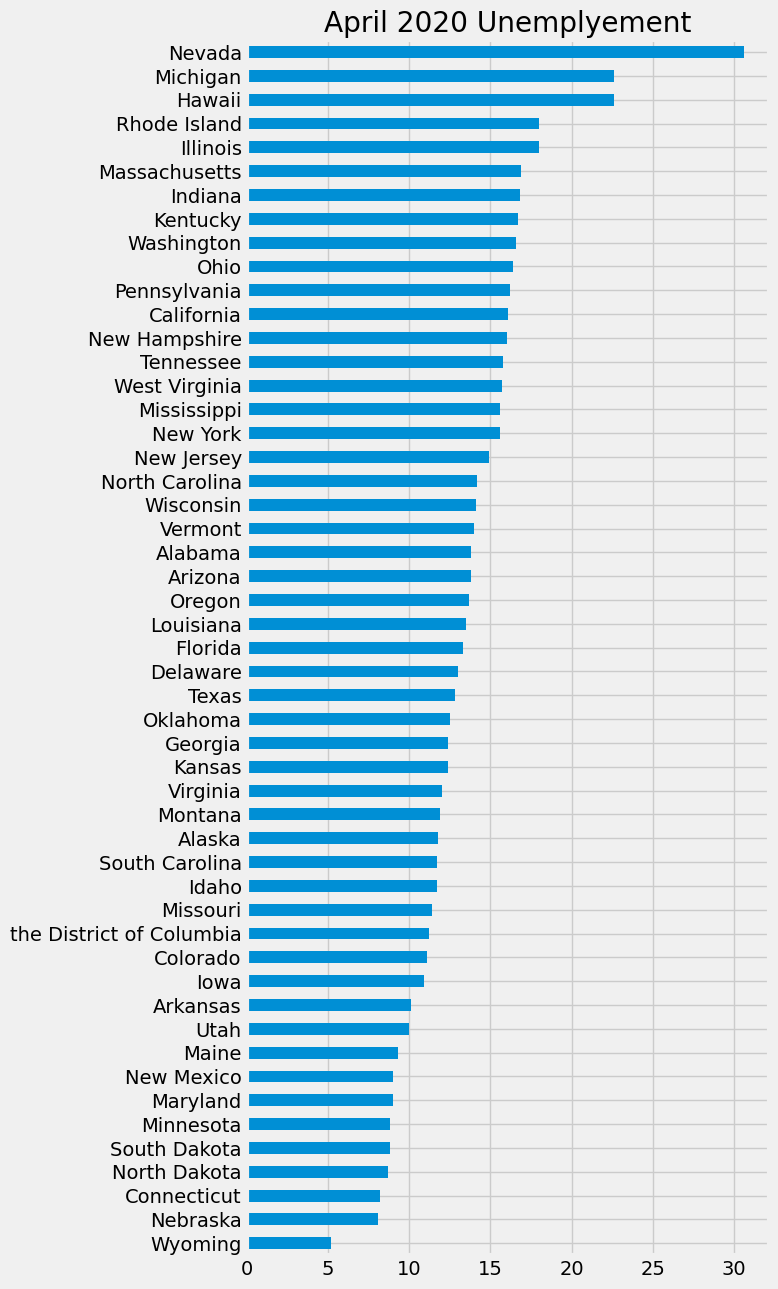

In [21]:
ax = unemp_df[unemp_df.index == '2020-04-01'].T.sort_values('2020-04-01').plot(kind = 'barh', figsize=(6,15), title = 'April 2020 Unemplyement')
ax.legend().remove()
plt.show()

Let's Pull Participation Rates

In [22]:
part_df = fred.search('Labor Force Participation Rate For ', filter=('frequency','Monthly'))
part_df.query('units == "Percent" and seasonal_adjustment_short == "SA"')
part_df = part_df.loc[part_df['id'].str.contains('LBSSA')]

In [23]:
part_df.head()

id realtime_start realtime_end  \
series id                                        
LBSSA01    LBSSA01     2023-08-18   2023-08-18   
LBSSA06    LBSSA06     2023-08-18   2023-08-18   
LBSSA12    LBSSA12     2023-08-18   2023-08-18   
LBSSA21    LBSSA21     2023-08-18   2023-08-18   
LBSSA27    LBSSA27     2023-08-18   2023-08-18   

                                                   title observation_start  \
series id                                                                    
LBSSA01       Labor Force Participation Rate for Alabama        1976-01-01   
LBSSA06    Labor Force Participation Rate for California        1976-01-01   
LBSSA12       Labor Force Participation Rate for Florida        1976-01-01   
LBSSA21      Labor Force Participation Rate for Kentucky        1976-01-01   
LBSSA27     Labor Force Participation Rate for Minnesota        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
LBSSA01        2023-06-01   Monthly               M  Percent           %   
LBSSA06        2023-06-01   Monthly               M  Percent           %   
LBSSA12        2023-06-01   Monthly               M  Percent           %   
LBSSA21        2023-06-01   Monthly               M  Percent           %   
LBSSA27        2023-06-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
LBSSA01    Seasonally Adjusted                        SA   
LBSSA06    Seasonally Adjusted                        SA   
LBSSA12    Seasonally Adjusted                        SA   
LBSSA21    Seasonally Adjusted                        SA   
LBSSA27    Seasonally Adjusted                        SA   

                        last_updated popularity  \
series id                                         
LBSSA01    2023-07-21 09:01:07-05:00         13   
LBSSA06    2023-07-21 09:01:05-05:00         16   
LBSSA12    2023-07-21 09:01:01-05:00         23   
LBSSA21    2023-07-21 09:01:02-05:00         21   
LBSSA27    2023-07-21 09:01:02-05:00         21   

                                                       notes  
series id                                                     
LBSSA01    A state's labor-force participation rate is th...  
LBSSA06    A state's labor-force participation rate is th...  
LBSSA12    A state's labor-force participation rate is th...  
LBSSA21    A state's labor-force participation rate is th...  
LBSSA27    A state's labor-force participation rate is th...

In [24]:
all_results = []
for i in part_df.index:
    results = fred.get_series(series_id = i)
    results = results.to_frame(name=i)
    all_results.append(results)

partt_df = pd.concat(all_results, axis=1)

In [25]:
partt_df.head()

LBSSA01  LBSSA06  LBSSA12  LBSSA21  LBSSA27  LBSSA26  LBSSA19  \
1976-01-01     57.0     62.6     55.8     60.5     65.6     61.6     64.4   
1976-02-01     56.9     62.4     55.7     60.3     65.5     61.5     64.3   
1976-03-01     56.8     62.2     55.5     60.2     65.4     61.5     64.2   
1976-04-01     56.8     62.2     55.5     60.1     65.4     61.6     64.1   
1976-05-01     56.8     62.3     55.4     60.1     65.5     61.7     64.1   

            LBSSA39  LBSSA55  LBSSA35  LBSSA48  LBSSA37  LBSSA51  LBSSA42  \
1976-01-01     61.7     65.6     60.8     63.8     66.5     65.9     58.4   
1976-02-01     61.7     65.5     60.5     63.5     66.3     65.8     58.3   
1976-03-01     61.7     65.4     60.3     63.4     66.2     65.6     58.3   
1976-04-01     61.6     65.4     60.3     63.5     66.2     65.5     58.3   
1976-05-01     61.6     65.5     60.3     63.6     66.3     65.4     58.3   

            LBSSA54  LBSSA25  LBSSA24  LBSSA13  LBSSA47  LBSSA17  LBSSA22  \
1976-01-01     52.5     64.8     64.3     63.7     59.6     63.0     56.8   
1976-02-01     52.4     64.7     64.2     63.6     59.4     63.0     56.6   
1976-03-01     52.3     64.6     64.1     63.5     59.3     62.9     56.5   
1976-04-01     52.3     64.6     64.1     63.5     59.3     62.9     56.4   
1976-05-01     52.2     64.6     64.1     63.6     59.4     63.0     56.4   

            LBSSA18  LBSSA08  LBSSA23  LBSSA04  LBSSA36  LBSSA29  LBSSA34  \
1976-01-01     64.0     67.2     62.1     59.5     58.0     60.5     61.5   
1976-02-01     63.9     67.0     61.9     59.2     58.0     60.3     61.4   
1976-03-01     63.8     66.8     61.9     59.1     58.0     60.3     61.4   
1976-04-01     63.8     66.6     61.8     59.1     58.0     60.4     61.5   
1976-05-01     63.9     66.5     61.7     59.1     58.1     60.6     61.6   

            LBSSA45  LBSSA09  LBSSA28  LBSSA53  LBSSA49  LBSSA31  LBSSA05  \
1976-01-01     65.3     64.2     58.8     60.9     62.8     64.9     57.9   
1976-02-01     65.2     64.1     58.6     60.7     62.6     64.9     57.8   
1976-03-01     65.0     64.0     58.5     60.6     62.5     64.8     57.7   
1976-04-01     64.9     64.1     58.5     60.6     62.5     64.8     57.7   
1976-05-01     64.7     64.3     58.5     60.7     62.6     64.8     57.7   

            LBSSA41  LBSSA02  LBSSA16  LBSSA50  LBSSA32  LBSSA46  LBSSA30  \
1976-01-01     62.9     69.0     63.0     63.6     71.3     64.6     62.7   
1976-02-01     62.7     68.4     62.8     63.4     70.8     64.4     62.5   
1976-03-01     62.5     67.8     62.7     63.2     70.5     64.4     62.4   
1976-04-01     62.4     67.9     62.7     63.5     70.4     64.3     62.3   
1976-05-01     62.5     67.9     62.8     63.6     70.5     64.3     62.2   

            LBSSA40  LBSSA33  LBSSA20  LBSSA38  LBSSA56  LBSSA10  LBSSA44  \
1976-01-01     59.3     65.9     65.1     62.6     65.3     62.7     63.8   
1976-02-01     59.2     65.6     65.0     62.4     64.9     62.5     63.7   
1976-03-01     59.1     65.6     64.9     62.3     64.7     62.5     63.6   
1976-04-01     59.0     65.7     65.0     62.5     64.9     62.4     63.7   
1976-05-01     59.0     66.0     65.1     62.6     65.2     62.4     63.6   

            LBSSA15  LBSSA11  
1976-01-01     69.9     64.4  
1976-02-01     69.6     64.5  
1976-03-01     69.6     64.5  
1976-04-01     69.4     64.5  
1976-05-01     69.3     64.4

In [26]:
partstates_dict = part_df['title'].str.replace('Labor Force Participation Rate for ', "").to_dict()
partstates_dict

{'LBSSA01': 'Alabama',
 'LBSSA06': 'California',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA27': 'Minnesota',
 'LBSSA26': 'Michigan',
 'LBSSA19': 'Iowa',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA35': 'New Mexico',
 'LBSSA48': 'Texas',
 'LBSSA37': 'North Carolina',
 'LBSSA51': 'Virginia',
 'LBSSA42': 'Pennsylvania',
 'LBSSA54': 'West Virginia',
 'LBSSA25': 'Massachusetts',
 'LBSSA24': 'Maryland',
 'LBSSA13': 'Georgia',
 'LBSSA47': 'Tennessee',
 'LBSSA17': 'Illinois',
 'LBSSA22': 'Louisiana',
 'LBSSA18': 'Indiana',
 'LBSSA08': 'Colorado',
 'LBSSA23': 'Maine',
 'LBSSA04': 'Arizona',
 'LBSSA36': 'New York',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA45': 'South Carolina',
 'LBSSA09': 'Connecticut',
 'LBSSA28': 'Mississippi',
 'LBSSA53': 'Washington',
 'LBSSA49': 'Utah',
 'LBSSA31': 'Nebraska',
 'LBSSA05': 'Arkansas',
 'LBSSA41': 'Oregon',
 'LBSSA02': 'Alaska',
 'LBSSA16': 'Idaho',
 'LBSSA50': 'Vermont',
 'LBSSA32': 'Nevada',
 'LBSSA46': 'South Dakota',
 

In [27]:
partt_df.columns = [partstates_dict[i] for i in partt_df.columns]

In [28]:
px.line(partt_df)

Unemployment vs Participation

<Axes: >

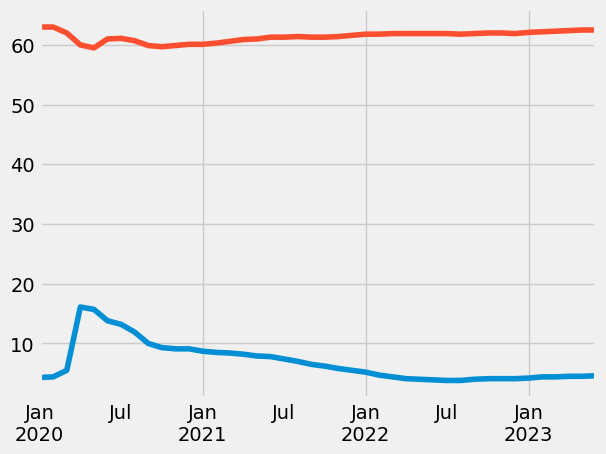

In [29]:
unemp_df.query('index >= "2020-01-01" and index < "2023-08-01"')['California'].plot()
partt_df.query('index >= "2020-01-01" and index < "2023-08-01"')['California'].plot()

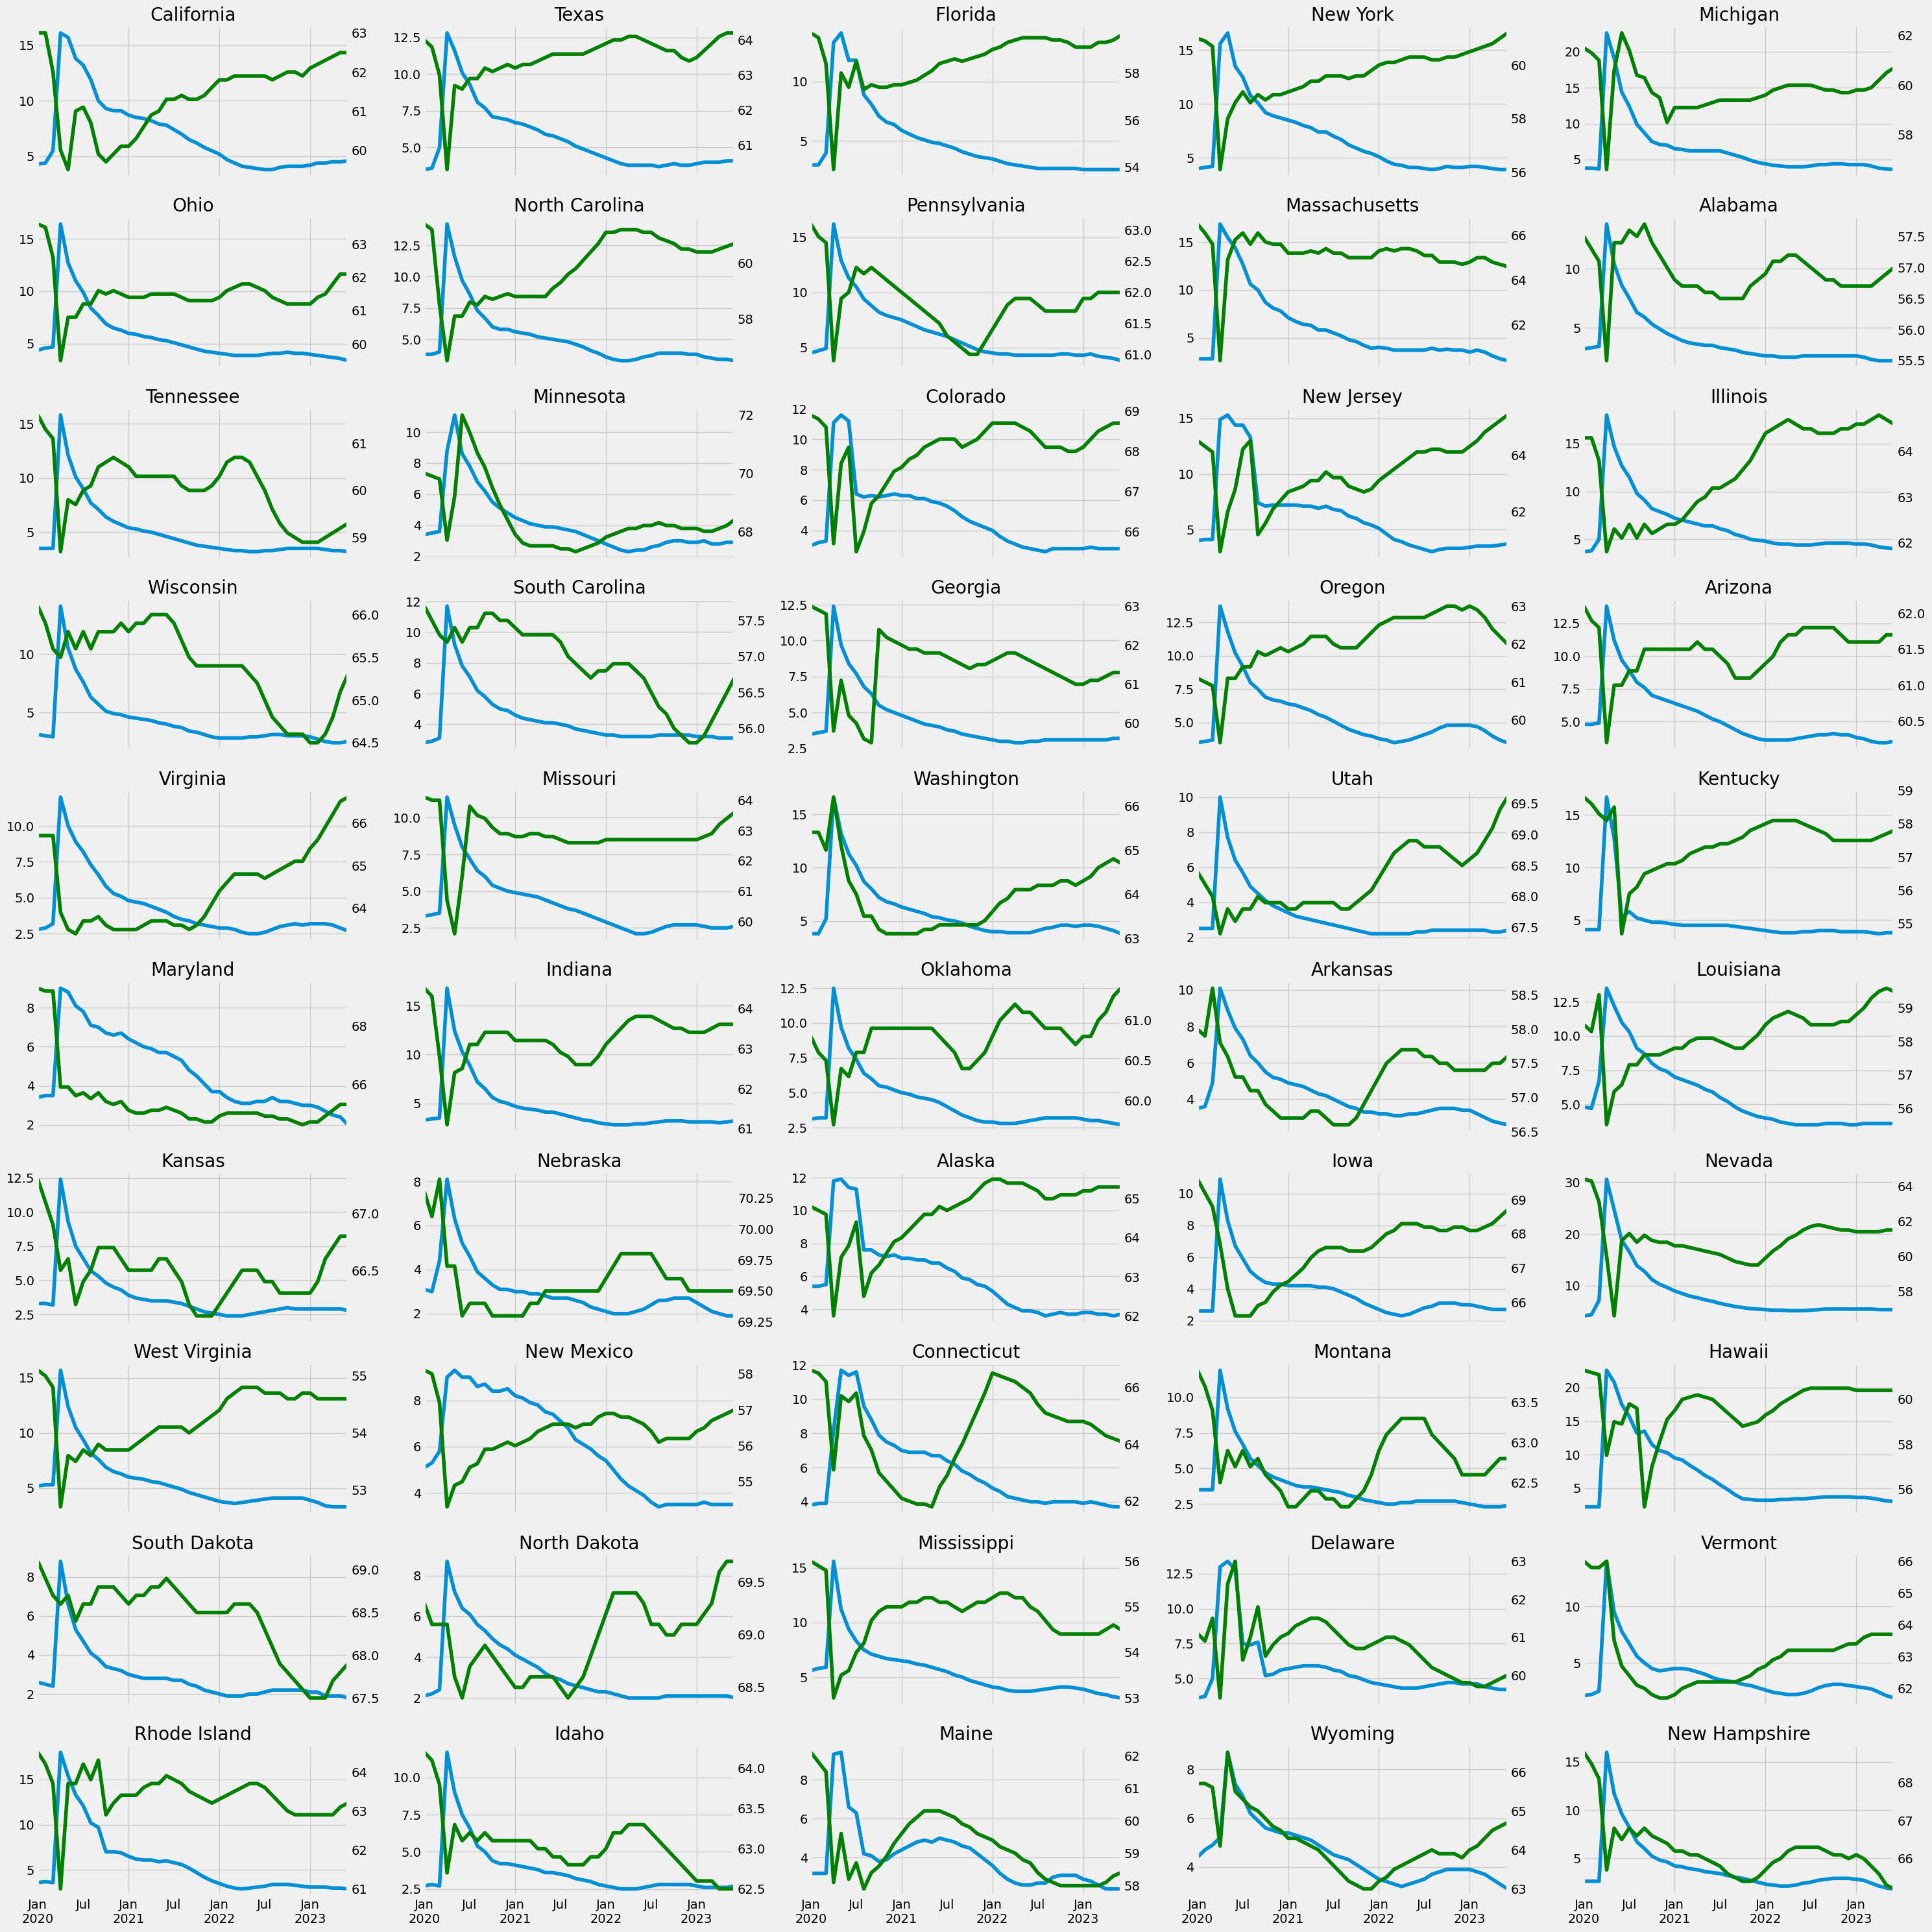

In [30]:
fig,ax = plt.subplots(10,5,sharex=True,figsize=(30, 30))
ax = ax.flatten()
i = 0
for states in unemp_df.columns:
    if states == 'the District of Columbia':
        continue
    ax2 = ax[i].twinx()
    unemp_df.query('index >= "2020-01-01" and index < "2023-08-01"')[states].plot(ax = ax[i], label='Unemployment')
    partt_df.query('index >= "2020-01-01" and index < "2023-08-01"')[states].plot(ax = ax2,color = 'g', label='Participation')
    ax2.grid(False)
    ax[i].set_title(states)
    i += 1
plt.tight_layout()
plt.show()